In [1]:
import pandas as pd

In [3]:
df_all = pd.read_csv("48648_88304_bundle_archive/alldata.csv")
df_all = df_all.loc[df_all['location'].notnull()]

In [4]:
df_all

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"
...,...,...,...,...,...
6959,Data Developer / Machine Learning Analyst,NetApp,Are you data-driven? We at NetApp believe in t...,574.0,"Sunnyvale, CA"
6960,Scientist I,"Pharmacyclics, an Abbvie Company",Pharmacyclics is committed to the development ...,26.0,"Sunnyvale, CA"
6961,Intern Scientist,Oath Inc,"Oath, a subsidiary of Verizon, is a values-led...",5.0,"Sunnyvale, CA"
6962,Senior Data & Applied Scientist,Microsoft,We are the Bing Core Relevance team responsibl...,4618.0,"Sunnyvale, CA"


In [5]:
df_all['location'] = [x.strip().split(',', maxsplit=1)[0] for x in df_all['location']]

In [6]:
df_all['location'].value_counts()[:10]

New York         848
Seattle          777
Cambridge        694
Boston           629
San Francisco    564
Chicago          471
San Diego        412
Washington       340
Mountain View    277
Atlanta          269
Name: location, dtype: int64

In [7]:
df_all_location_lat_lon = {
    'New York':[40.71, -74],
    'Seattle':[47.61, -122.33],
    'Cambridge':[42.37, -71.11],
    'Boston':[42.36, -71.06],
    'San Francisco':[37.77, -122.42],
    'Chicago':[41.88, -87.63],
    'San Diego':[32.72, -117.16],
    'Washington':[38.91, -77.04],
    'Mountain View':[37.39, -122.09],
    'Atlanta':[33.75, -84.39]
}

In [8]:
df_ny = df_all.loc[df_all['location'] == 'New York']

In [9]:
df_ny_1 = df_ny.loc[[x in df_ny['position'].value_counts().keys().tolist()[:7] for x in df_ny['position']]]

In [10]:
print(df_ny['position'].value_counts()[:7])

sum(df_ny['position'].value_counts()[:7])

Data Scientist               93
Research Analyst             21
Senior Data Scientist        17
Data Engineer                12
Lead Data Scientist          11
Quantitative Analyst          9
Machine Learning Engineer     7
Name: position, dtype: int64


170

In [11]:
df_ny_1

,position,company,description,reviews,location
3413,Data Scientist,Blackboard Insurance,We’re looking for a rogue Data Scientist who w...,NaN,New York
3424,Data Scientist,"J.Crew Group, Inc.",Title: Data Scientist\nReports to: VP – Analyt...,760.0,New York
3431,Data Scientist,Sweeten,"Join Sweeten, a fast growing, award-winning te...",NaN,New York
3432,Data Scientist,"Edison Software, Inc.",The Role\nMachine-driven investment strategies...,NaN,New York
3435,Data Scientist,Organic,We’re looking for a data scientist with unlimi...,32.0,New York
...,...,...,...,...,...
4385,Data Scientist,SpinCar,"SpinCar , a leading provider of 360-degree ima...",NaN,New York
4386,Data Scientist,MetroPlus Health Plan,Marketing Statement\nMetroPlus Health Plan pro...,96.0,New York
4388,Data Scientist,Amazon.com,Job Description\nAt Amazon we continually look...,25883.0,New York
4389,Data Scientist,SG Analytics,Job SummaryRole: Senior Data ScientistLocation...,15.0,New York


In [12]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

In [13]:
df_all_location_text_lat_lon = {
    'New York':[39.71, -73],
    'Seattle':[48.61, -124.33],
    'Cambridge':[45.37, -71.11],
    'Boston':[43.36, -72.06],
    'San Francisco':[38.77, -123.42],
    'Chicago':[43, -89.63],
    'San Diego':[32.72, -117.16],
    'Washington':[37.91, -76.04],
    'Mountain View':[35.39, -121.09],
    'Atlanta':[34.75, -85.39]
}

In [74]:
top_10_locs = df_all['location'].value_counts()[:10]
top_10_locs

New York         848
Seattle          777
Cambridge        694
Boston           629
San Francisco    564
Chicago          471
San Diego        412
Washington       340
Mountain View    277
Atlanta          269
Name: location, dtype: int64

In [81]:
a = top_10_locs / (max(top_10_locs) - min(top_10_locs))
a = a*10
a

New York         14.645941
Seattle          13.419689
Cambridge        11.986183
Boston           10.863558
San Francisco     9.740933
Chicago           8.134715
San Diego         7.115717
Washington        5.872193
Mountain View     4.784111
Atlanta           4.645941
Name: location, dtype: float64

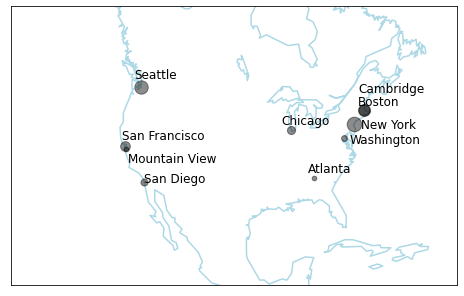

In [82]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='c',
            width=8E6, height=5E6, 
            lat_0=40, lon_0=-100,)
#m.etopo(scale=0.5, alpha=0.5)
m.drawcoastlines(color='lightblue', linewidth=1.5)

# Map (long, lat) to (x, y) for plotting
for name, loc in df_all_location_lat_lon.items():
    t_loc = m(loc[1], loc[0])
    
    text_loc_ll = df_all_location_text_lat_lon[name]
    text_loc = m(text_loc_ll[1], text_loc_ll[0])
    plt.plot(t_loc[0], t_loc[1], marker='o', alpha=0.45, markersize=a[name], color='black')
    plt.text(text_loc[0], text_loc[1], name, fontsize=12);